In [75]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib==3.7

In [2]:
!pip install cooler
!pip install hicrep
!pip install cooltools
!pip install fuc

  Using cached cooltools-0.7.1.tar.gz (8.7 MB)
  Using cached cooltools-0.7.1.tar.gz (8.7 MB)
  Installing build dependencies ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cython-3.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
  Using cached cython-3.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 110.7 MB/s eta 0:00:00
Using cached cython-3.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.8 MB ? eta -:--:--Downloading bioframe-0.8.0-py3-none-any.whl (153 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 110.7 MB/s eta 0:00:00
Using cached cython-3.1.1-cp311-cp311-manylinux_2_1

In [3]:
import matplotlib as mpl
mpl.__version__

'3.10.0'

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
import numpy as np
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool
import cooler
import cooltools
from cooltools import insulation
import scipy

In [ ]:
from matplotlib.ticker import EngFormatter
from skimage.filters import threshold_li, threshold_otsu
from fuc import pybed
import itertools

In [5]:
mcool1 = '/content/drive/MyDrive/4DNFIY8RCGSG.mcool'
mcool2 = '/content/drive/MyDrive/4DNFIF1CGHBM.mcool'

In [6]:
cooler.fileops.list_coolers(mcool1)

['/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [7]:
cooler.fileops.list_coolers(mcool2)

['/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [8]:
resolution = 25000
clr1 = cooler.Cooler(f'{mcool1}::resolutions/{resolution}')
resolution = 25000
clr2 = cooler.Cooler(f'{mcool2}::resolutions/{resolution}')

In [10]:
clr1.info


{'bin-size': np.int64(25000),
 'bin-type': 'fixed',
 'creation-date': '2024-03-02T10:35:57.515033',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.3',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': np.int64(109032),
 'nchroms': np.int64(21),
 'nnz': np.int64(99824129),
 'storage-mode': 'symmetric-upper',
 'sum': np.int64(199992852)}

In [11]:
clr2.info

{'bin-size': np.int64(25000),
 'bin-type': 'fixed',
 'creation-date': '2024-03-02T09:16:24.009372',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.3',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': np.int64(109032),
 'nchroms': np.int64(21),
 'nnz': np.int64(120330448),
 'storage-mode': 'symmetric-upper',
 'sum': np.int64(217151438)}

In [12]:
clr1.chromnames

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chrX',
 'chrY']

In [15]:
'weight' in clr1.bins().columns

True

In [16]:
'weight' in clr1.bins().columns

True

In [17]:
start = 14_500_000
end = start + 1_500_000
region = ('chr1', start, end)
m1 = clr1.matrix(as_pixels=True, balance=True).fetch(region)
start = 44_000_000
end = start + 1_500_000
region = ('chr1', start, end)
m2 = clr2.matrix(as_pixels=True, balance=True).fetch(region)

### Таблица с координатами и контактами

In [18]:
m1

,bin1_id,bin2_id,count,balanced
0,580,580,266,0.069189
1,580,581,131,0.036356
2,580,582,52,0.013129
3,580,583,33,0.008968
4,580,584,17,0.004960
...,...,...,...,...
1792,637,638,99,0.039812
1793,637,639,70,0.021893
1794,638,638,251,0.091511
1795,638,639,182,0.051606


In [19]:
m2

,bin1_id,bin2_id,count,balanced
0,1760,1760,326,0.055954
1,1760,1761,229,0.046148
2,1760,1762,70,0.012846
3,1760,1763,35,0.008177
4,1760,1764,29,0.006371
...,...,...,...,...
1700,1817,1818,111,0.033834
1701,1817,1819,36,0.012657
1702,1818,1818,269,0.059975
1703,1818,1819,144,0.037033


Все сбалансировано!

In [25]:
start = 14_500_000
end = start + 1_000_000
region = ('chr1', start, end)
matr1 = clr1.matrix(balance=True).fetch(region)
start = 25_500_000
end = start + 1_000_000
region = ('chr1', start, end)
matr2 = clr2.matrix(balance=True).fetch(region)

<ipython-input-21-072d49b538a0>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr1),cmap='coolwarm')


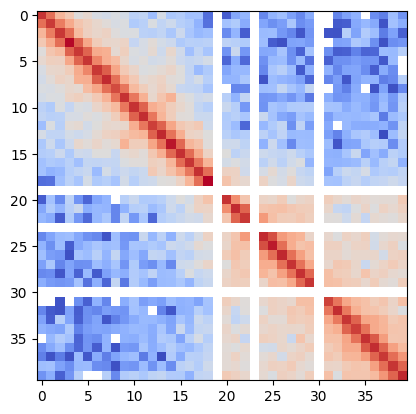

In [21]:
plt.imshow(np.log(matr1),cmap='coolwarm')

<ipython-input-26-a5a8797d6e39>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr2),cmap='coolwarm')


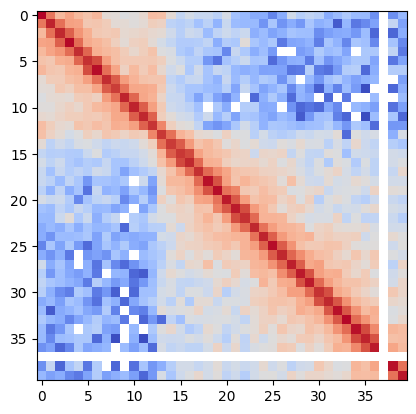

In [26]:
plt.imshow(np.log(matr2),cmap='coolwarm')

### Таблица в командной строке командой *cooler dump*

In [27]:
! cooler dump -b -t pixels --header --join -r chr1:14,500,000-15,500,000 /content/drive/MyDrive/4DNFIY8RCGSG.mcool::resolutions/25000 | head

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr1	14500000	14525000	chr1	14500000	14525000	266	0.0691886
chr1	14500000	14525000	chr1	14525000	14550000	131	0.036356
chr1	14500000	14525000	chr1	14550000	14575000	52	0.0131288
chr1	14500000	14525000	chr1	14575000	14600000	33	0.00896802
chr1	14500000	14525000	chr1	14600000	14625000	17	0.00496023
chr1	14500000	14525000	chr1	14625000	14650000	20	0.00594911
chr1	14500000	14525000	chr1	14650000	14675000	16	0.00421769
chr1	14500000	14525000	chr1	14675000	14700000	15	0.00379191
chr1	14500000	14525000	chr1	14700000	14725000	19	0.00435708


In [28]:
! cooler dump -b -t pixels --header --join -r chr1:25,500,000-26,500,000 /content/drive/MyDrive/4DNFIF1CGHBM.mcool::resolutions/25000 | head

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr1	25500000	25525000	chr1	25500000	25525000	121	0.0689449
chr1	25500000	25525000	chr1	25525000	25550000	65	0.0242813
chr1	25500000	25525000	chr1	25550000	25575000	30	0.00923223
chr1	25500000	25525000	chr1	25575000	25600000	26	0.0128746
chr1	25500000	25525000	chr1	25600000	25625000	23	0.00922461
chr1	25500000	25525000	chr1	25625000	25650000	19	0.00744216
chr1	25500000	25525000	chr1	25650000	25675000	20	0.00931715
chr1	25500000	25525000	chr1	25675000	25700000	11	0.0039859
chr1	25500000	25525000	chr1	25700000	25725000	12	0.0038178


### Таблица с бинами

In [29]:
pix1=clr1.pixels()[:]

In [30]:
pix1

,bin1_id,bin2_id,count
0,120,120,177
1,120,121,98
2,120,122,25
3,120,123,17
4,120,124,21
...,...,...,...
99824124,108980,108981,1
99824125,108986,108987,1
99824126,108990,108990,10
99824127,108990,108991,26


In [31]:
pix2=clr2.pixels()[:]

In [32]:
pix2

,bin1_id,bin2_id,count
0,120,120,175
1,120,121,92
2,120,122,27
3,120,123,15
4,120,124,16
...,...,...,...
120330443,108967,108991,1
120330444,108989,108991,1
120330445,108990,108990,10
120330446,108990,108991,38


In [33]:
bins1=clr1.bins()[:]

In [34]:
bins1

,chrom,start,end,KR,VC,VC_SQRT,weight
0,chr1,0,25000,NaN,0.0,0.0,NaN
1,chr1,25000,50000,NaN,0.0,0.0,NaN
2,chr1,50000,75000,NaN,0.0,0.0,NaN
3,chr1,75000,100000,NaN,0.0,0.0,NaN
4,chr1,100000,125000,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
109027,chrY,91625000,91650000,NaN,0.0,0.0,NaN
109028,chrY,91650000,91675000,NaN,0.0,0.0,NaN
109029,chrY,91675000,91700000,NaN,0.0,0.0,NaN
109030,chrY,91700000,91725000,NaN,0.0,0.0,NaN


In [35]:
bins2=clr2.bins()[:]

In [36]:
bins2

,chrom,start,end,KR,VC,VC_SQRT,weight
0,chr1,0,25000,NaN,0.0,0.0,NaN
1,chr1,25000,50000,NaN,0.0,0.0,NaN
2,chr1,50000,75000,NaN,0.0,0.0,NaN
3,chr1,75000,100000,NaN,0.0,0.0,NaN
4,chr1,100000,125000,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
109027,chrY,91625000,91650000,NaN,0.0,0.0,NaN
109028,chrY,91650000,91675000,NaN,0.0,0.0,NaN
109029,chrY,91675000,91700000,NaN,0.0,0.0,NaN
109030,chrY,91700000,91725000,NaN,0.0,0.0,NaN


### Кривые зависимости число контактов от расстояния для выбранной хромосомы

<ipython-input-38-f3ece6a82bcc>:3: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m1,i))
<ipython-input-38-f3ece6a82bcc>:7: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m2,i))


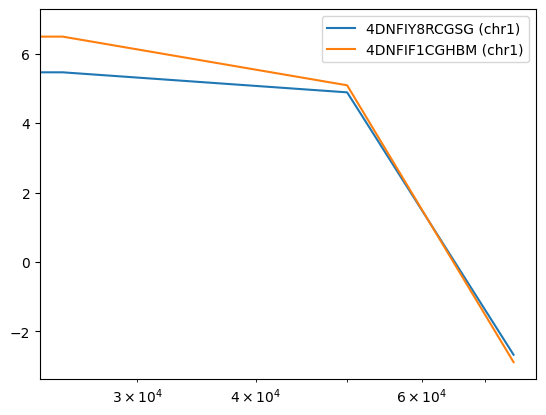

In [38]:
z=np.zeros(len(m1))
for i in range(len(m1)):
  z[i]=np.nanmean(np.diagonal(m1,i))
plt.plot(np.arange(len(m1))*25000,np.log(z),label='4DNFIY8RCGSG (chr1)')
z=np.zeros(len(m2))
for i in range(len(m2)):
  z[i]=np.nanmean(np.diagonal(m2,i))
plt.plot(np.arange(len(m2))*25000,np.log(z),label='4DNFIF1CGHBM (chr1)')
plt.xscale('log')
plt.legend()

### insulation score и границы TAD

In [39]:
import cooltools
from cooltools import insulation
windows = [2*resolution,3*resolution,5*resolution]
insulation_table1 = insulation(clr1, windows, verbose=True)

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrX
INFO:root:Processing region chrY


In [40]:
insulation_table1[36:3000]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_75000,n_valid_pixels_75000,log2_insulation_score_125000,n_valid_pixels_125000,boundary_strength_50000,boundary_strength_75000,boundary_strength_125000,is_boundary_50000,is_boundary_75000,is_boundary_125000
36,chr1,900000,925000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
37,chr1,925000,950000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
38,chr1,950000,975000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
39,chr1,975000,1000000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
40,chr1,1000000,1025000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,chr1,74875000,74900000,chr1,False,-0.388939,1.0,-0.335290,6.0,-0.045276,22.0,NaN,1.237026,0.189256,False,True,False
2996,chr1,74900000,74925000,chr1,False,-0.108773,1.0,-0.207536,6.0,0.022501,22.0,NaN,NaN,NaN,False,False,False
2997,chr1,74925000,74950000,chr1,False,-0.255332,1.0,0.060780,6.0,0.362265,22.0,0.146559,NaN,NaN,False,False,False
2998,chr1,74950000,74975000,chr1,False,0.482001,1.0,0.696801,6.0,0.726826,17.0,NaN,NaN,NaN,False,False,False


In [41]:
insulation_table2 = insulation(clr2, windows, verbose=True)

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chrX
INFO:root:Processing region chrY


In [42]:
insulation_table2[36:3000]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_75000,n_valid_pixels_75000,log2_insulation_score_125000,n_valid_pixels_125000,boundary_strength_50000,boundary_strength_75000,boundary_strength_125000,is_boundary_50000,is_boundary_75000,is_boundary_125000
36,chr1,900000,925000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
37,chr1,925000,950000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
38,chr1,950000,975000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
39,chr1,975000,1000000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
40,chr1,1000000,1025000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,chr1,74875000,74900000,chr1,False,0.177880,1.0,-0.120521,6.0,-0.009733,22.0,NaN,0.478515,0.050967,False,True,False
2996,chr1,74900000,74925000,chr1,False,0.086876,1.0,0.003982,6.0,0.129577,22.0,NaN,NaN,NaN,False,False,False
2997,chr1,74925000,74950000,chr1,False,0.041615,1.0,0.166647,6.0,0.316363,22.0,0.136265,NaN,NaN,False,False,False
2998,chr1,74950000,74975000,chr1,False,0.208833,1.0,0.467165,6.0,0.537672,17.0,NaN,NaN,NaN,False,False,False


In [47]:
import numpy as np
import itertools


(25500000.0, 26500000.0)

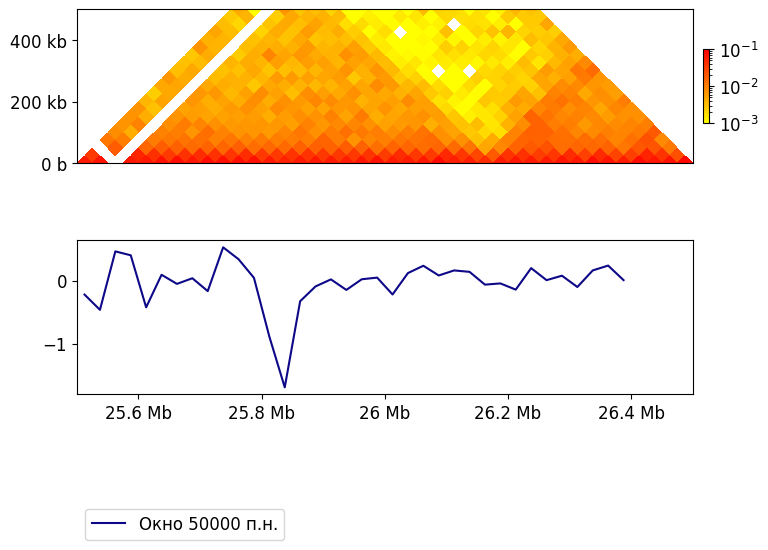

In [52]:
plt.rcParams['font.size'] = 12
def render_tilted_heatmap(axis, matrix, base=0, scale=1, *args, **kwargs):
    grid = [base + i * scale for i in range(matrix.shape[0] + 1)]
    rotate = np.array([[1, 0.5], [-1, 0.5]])

    coords = [(y, x) for x, y in itertools.product(grid, reversed(grid))]
    transformed = np.dot(np.array(coords), rotate)

    x_mesh = transformed[:, 1].reshape(matrix.shape[0] + 1, -1)
    y_mesh = transformed[:, 0].reshape(matrix.shape[0] + 1, -1)

    image = axis.pcolormesh(x_mesh, y_mesh, np.flipud(matrix), *args, **kwargs)
    image.set_rasterized(True)
    return image

def stylize_axes(ax, show_x=True, show_y=True, rotate_labels=True):
    formatter = EngFormatter('b')
    if show_y:
        ax.yaxis.set_major_formatter(formatter)
    if show_x:
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(bottom=True)
    if rotate_labels:
        ax.tick_params(axis='x', rotation=45)

chromosome = 'chr1'
start_pos = 25_500_000
region_length = 1_000_000
stop_pos = start_pos + region_length
view_region = (chromosome, start_pos, stop_pos)
color_norm = LogNorm(vmin=0.001, vmax=0.1)
matrix_data = clr1.matrix(balance=True).fetch(view_region)
fig, main_ax = plt.subplots(figsize=(18, 6))
heatmap_img = render_tilted_heatmap(
    main_ax,
    matrix_data,
    base=view_region[1],
    scale=resolution,
    cmap='autumn_r',
    norm=color_norm
)

main_ax.set_aspect(0.5)
main_ax.set_ylim(0, 10 * windows[0])
stylize_axes(main_ax, rotate_labels=False)
main_ax.xaxis.set_visible(False)
divider = make_axes_locatable(main_ax)
colorbar_ax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(heatmap_img, cax=colorbar_ax)
selected_insulation = bioframe.select(insulation_table1, view_region)
insul_ax = divider.append_axes("bottom", size="50%", pad=0.0, sharex=main_ax)
insul_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0, 1, 5))))
signal_center = selected_insulation[['start', 'end']].mean(axis=1)
signal_column = f'log2_insulation_score_{windows[0]}'
insul_ax.plot(signal_center, selected_insulation[signal_column], label=f'Окно {windows[0]} п.н.')
insul_ax.legend(bbox_to_anchor=(0, -1), loc='lower left', ncol=4)
stylize_axes(insul_ax, show_y=False, rotate_labels=False)
main_ax.set_xlim(start_pos, stop_pos)


(25500000.0, 26500000.0)

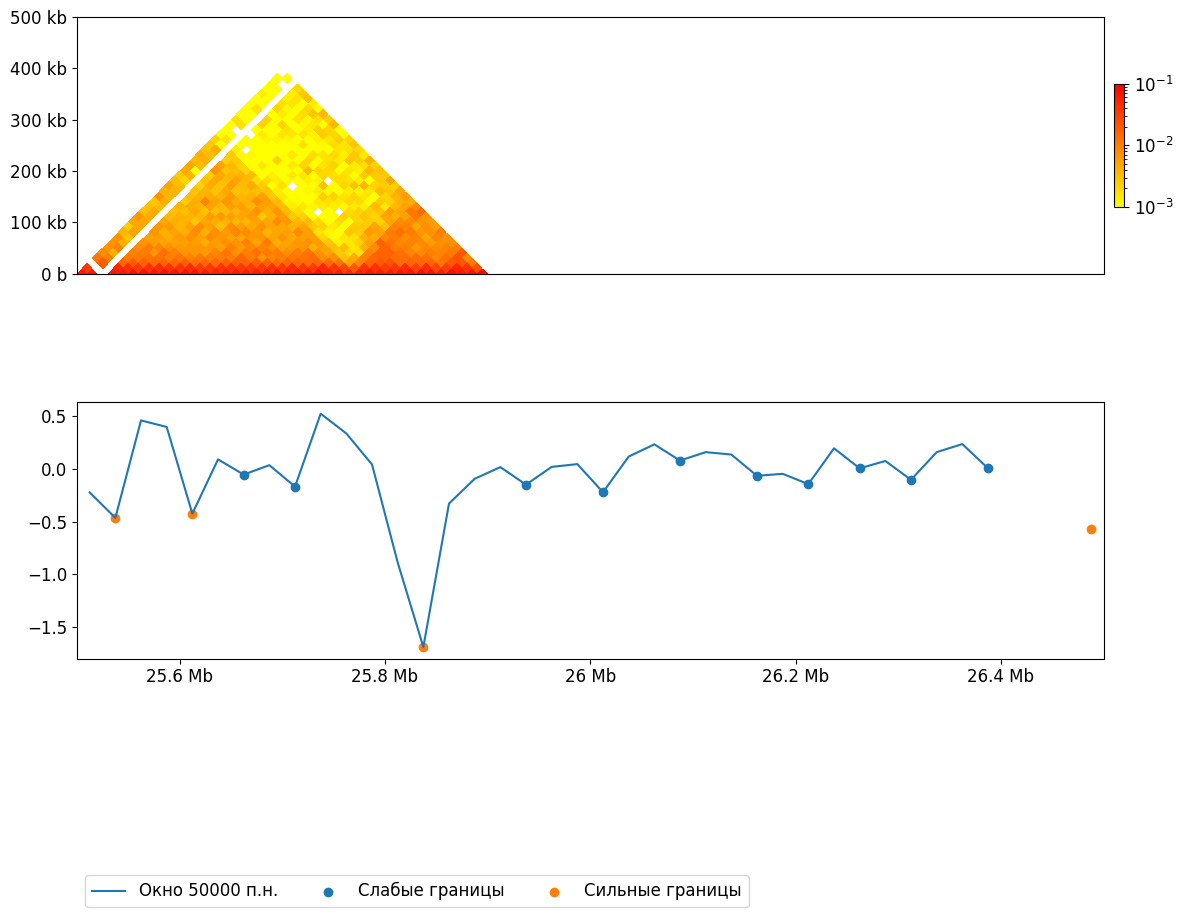

In [73]:
plt.rcParams['font.size'] = 12

def render_tilted_heatmap(axis, matrix, base=0, scale=1, *args, **kwargs):
    grid = [base + i * scale for i in range(matrix.shape[0] + 1)]
    rotate = np.array([[1, 0.5], [-1, 0.5]])
    coords = [(y, x) for x, y in itertools.product(grid, reversed(grid))]
    transformed = np.dot(np.array(coords), rotate)
    x_mesh = transformed[:, 1].reshape(matrix.shape[0] + 1, -1)
    y_mesh = transformed[:, 0].reshape(matrix.shape[0] + 1, -1)
    image = axis.pcolormesh(x_mesh, y_mesh, np.flipud(matrix), *args, **kwargs)
    image.set_rasterized(True)
    return image

def stylize_axes(ax, show_x=True, show_y=True, rotate_labels=True):
    formatter = EngFormatter('b')
    if show_y:
        ax.yaxis.set_major_formatter(formatter)
    if show_x:
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(bottom=True)
    if rotate_labels:
        ax.tick_params(axis='x', rotation=45)

chromosome = 'chr1'
start_pos = 25_500_000
region_length = 1_000_000
end_pos = start_pos + region_length
region = (chromosome, start_pos, end_pos)

norm = LogNorm(vmin=0.001, vmax=0.1)
data = clr1.matrix(balance=True).fetch(region)

fig, ax = plt.subplots(figsize=(20, 10))
heatmap = render_tilted_heatmap(ax, data, base=start_pos, scale=resolution, cmap='autumn_r', norm=norm)
ax.set_aspect(0.5)
ax.set_ylim(0, 10 * windows[0])
stylize_axes(ax, rotate_labels=False)
ax.xaxis.set_visible(False)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(heatmap, cax=cbar_ax)
insul_region = bioframe.select(insulation_table1, region)
ins_ax = divider.append_axes("bottom", size="50%", pad=0.0, sharex=ax)
x_vals = insul_region[['start', 'end']].mean(axis=1)
y_vals = insul_region[f'log2_insulation_score_{windows[0]}']
ins_ax.plot(x_vals, y_vals, label=f'Окно {windows[0]} п.н.')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong = boundaries[boundaries[f'is_boundary_{windows[0]}']]

ins_ax.scatter(weak[['start', 'end']].mean(axis=1), weak[y_vals.name], label='Слабые границы')
ins_ax.scatter(strong[['start', 'end']].mean(axis=1), strong[y_vals.name], label='Сильные границы')

ins_ax.legend(bbox_to_anchor=(0, -1), loc='lower left', ncol=4)
stylize_axes(ins_ax, show_y=False, rotate_labels=False)

ax.set_xlim(start_pos, end_pos)


[Text(0.5, 0, 'Сила границы')]

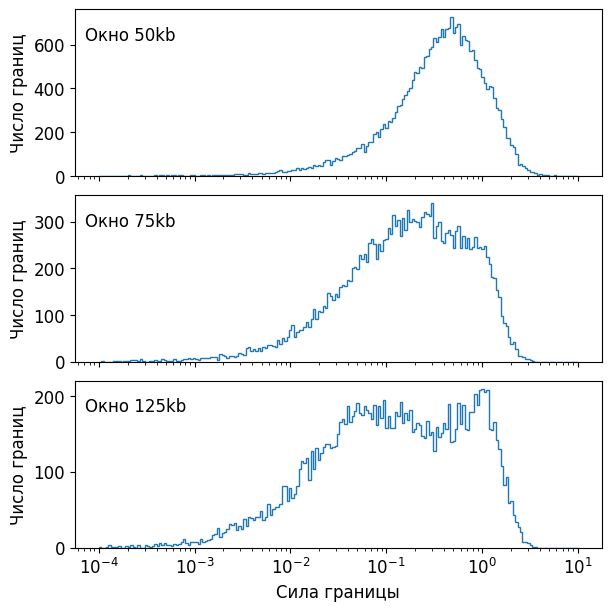

In [56]:
hist_config = dict(
    bins=np.logspace(-4, 1, 200),
    histtype='step',
    lw=2,
)

fig, axes = plt.subplots(len(windows), 1, sharex=True, figsize=(6, 6), constrained_layout=True)

for w, ax in zip(windows, axes):
    strengths = insulation_table1[f'boundary_strength_{w}'].dropna()
    ax.hist(strengths, **hist_config)
    ax.set(
        xscale='log',
        ylabel='Число границ'
    )
    ax.text(0.02, 0.9, f'Окно {w//1000}kb', transform=ax.transAxes, ha='left', va='top')

axes[-1].set(xlabel='Сила границы')


[Text(0.5, 0, 'Boundary strength')]

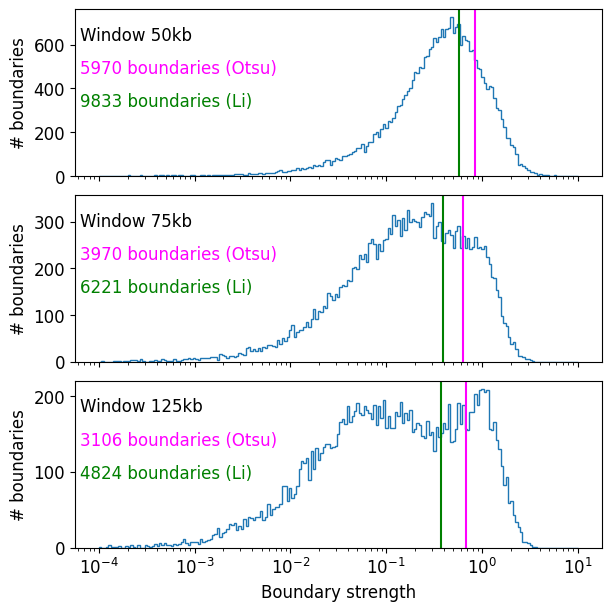

In [78]:
from skimage.filters import threshold_li, threshold_otsu

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table1[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table1[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table1[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table1[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table1[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

(14500000.0, 15500000.0)

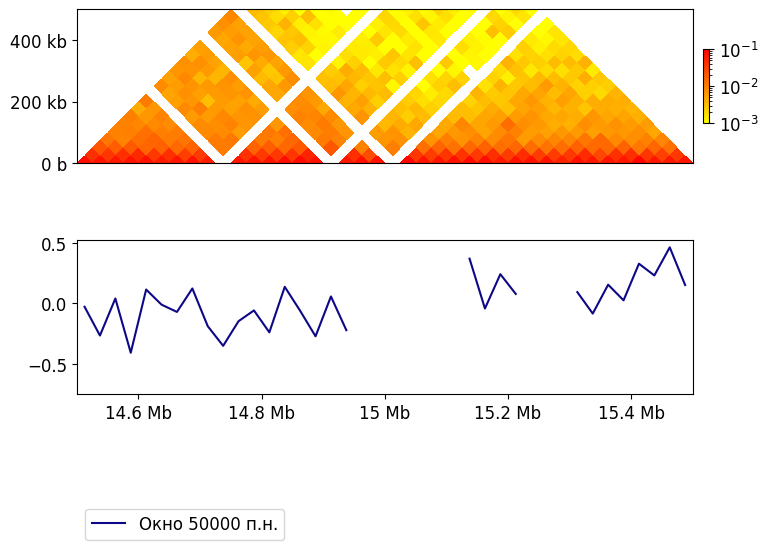

In [58]:
plt.rcParams['font.size'] = 12
def render_tilted_heatmap(axis, matrix, base=0, scale=1, *args, **kwargs):
    grid = [base + i * scale for i in range(matrix.shape[0] + 1)]
    rotate = np.array([[1, 0.5], [-1, 0.5]])

    coords = [(y, x) for x, y in itertools.product(grid, reversed(grid))]
    transformed = np.dot(np.array(coords), rotate)

    x_mesh = transformed[:, 1].reshape(matrix.shape[0] + 1, -1)
    y_mesh = transformed[:, 0].reshape(matrix.shape[0] + 1, -1)

    image = axis.pcolormesh(x_mesh, y_mesh, np.flipud(matrix), *args, **kwargs)
    image.set_rasterized(True)
    return image

def stylize_axes(ax, show_x=True, show_y=True, rotate_labels=True):
    formatter = EngFormatter('b')
    if show_y:
        ax.yaxis.set_major_formatter(formatter)
    if show_x:
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(bottom=True)
    if rotate_labels:
        ax.tick_params(axis='x', rotation=45)

chromosome = 'chr1'
start_pos = 14_500_000
region_length = 1_000_000
stop_pos = start_pos + region_length
view_region = (chromosome, start_pos, stop_pos)
color_norm = LogNorm(vmin=0.001, vmax=0.1)
matrix_data = clr1.matrix(balance=True).fetch(view_region)
fig, main_ax = plt.subplots(figsize=(18, 6))
heatmap_img = render_tilted_heatmap(
    main_ax,
    matrix_data,
    base=view_region[1],
    scale=resolution,
    cmap='autumn_r',
    norm=color_norm
)

main_ax.set_aspect(0.5)
main_ax.set_ylim(0, 10 * windows[0])
stylize_axes(main_ax, rotate_labels=False)
main_ax.xaxis.set_visible(False)
divider = make_axes_locatable(main_ax)
colorbar_ax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(heatmap_img, cax=colorbar_ax)
selected_insulation = bioframe.select(insulation_table1, view_region)
insul_ax = divider.append_axes("bottom", size="50%", pad=0.0, sharex=main_ax)
insul_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0, 1, 5))))
signal_center = selected_insulation[['start', 'end']].mean(axis=1)
signal_column = f'log2_insulation_score_{windows[0]}'
insul_ax.plot(signal_center, selected_insulation[signal_column], label=f'Окно {windows[0]} п.н.')
insul_ax.legend(bbox_to_anchor=(0, -1), loc='lower left', ncol=4)
stylize_axes(insul_ax, show_y=False, rotate_labels=False)
main_ax.set_xlim(start_pos, stop_pos)


(14500000.0, 15500000.0)

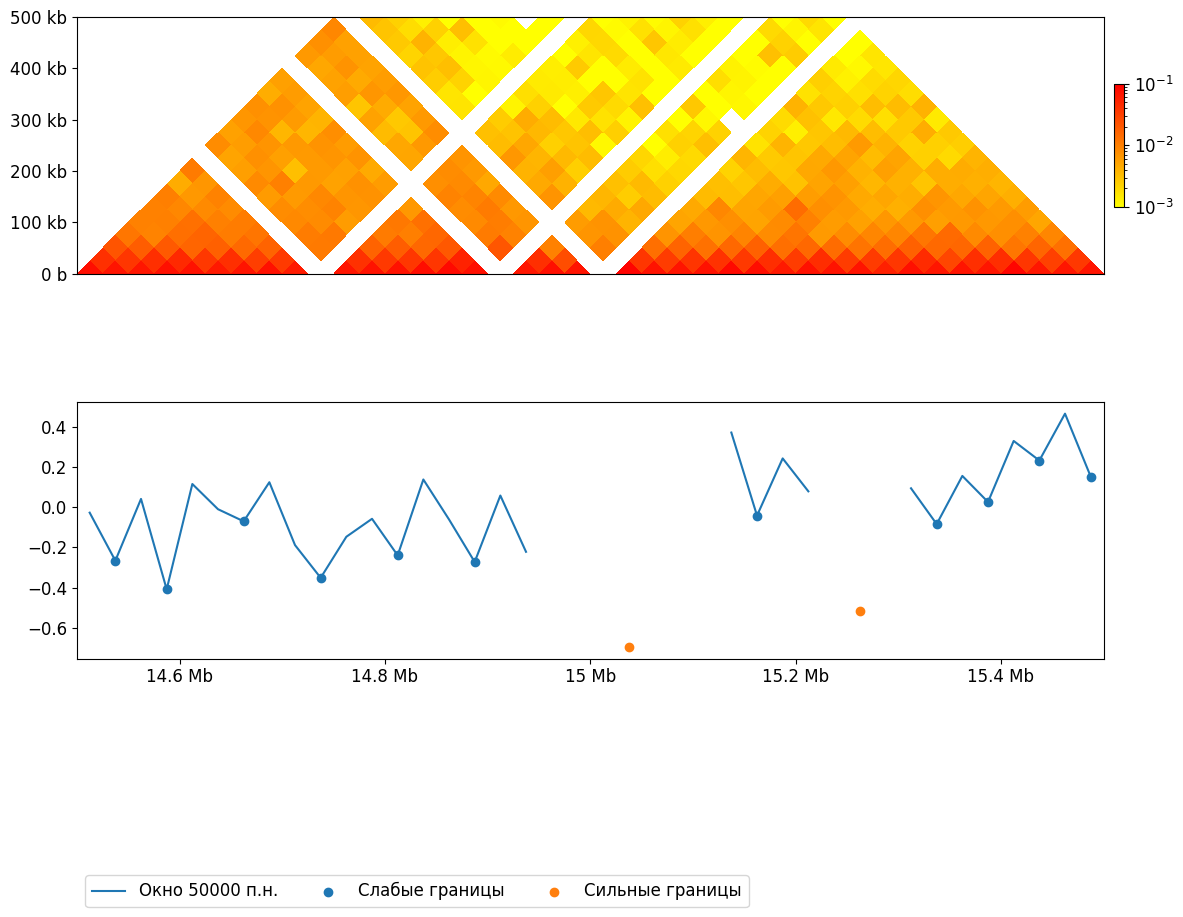

In [59]:
plt.rcParams['font.size'] = 12

def render_tilted_heatmap(axis, matrix, base=0, scale=1, *args, **kwargs):
    grid = [base + i * scale for i in range(matrix.shape[0] + 1)]
    rotate = np.array([[1, 0.5], [-1, 0.5]])
    coords = [(y, x) for x, y in itertools.product(grid, reversed(grid))]
    transformed = np.dot(np.array(coords), rotate)
    x_mesh = transformed[:, 1].reshape(matrix.shape[0] + 1, -1)
    y_mesh = transformed[:, 0].reshape(matrix.shape[0] + 1, -1)
    image = axis.pcolormesh(x_mesh, y_mesh, np.flipud(matrix), *args, **kwargs)
    image.set_rasterized(True)
    return image

def stylize_axes(ax, show_x=True, show_y=True, rotate_labels=True):
    formatter = EngFormatter('b')
    if show_y:
        ax.yaxis.set_major_formatter(formatter)
    if show_x:
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(bottom=True)
    if rotate_labels:
        ax.tick_params(axis='x', rotation=45)

chromosome = 'chr1'
start_pos = 14_500_000
region_length = 1_000_000
end_pos = start_pos + region_length
region = (chromosome, start_pos, end_pos)

norm = LogNorm(vmin=0.001, vmax=0.1)
data = clr1.matrix(balance=True).fetch(region)

fig, ax = plt.subplots(figsize=(20, 10))
heatmap = render_tilted_heatmap(ax, data, base=start_pos, scale=resolution, cmap='autumn_r', norm=norm)
ax.set_aspect(0.5)
ax.set_ylim(0, 10 * windows[0])
stylize_axes(ax, rotate_labels=False)
ax.xaxis.set_visible(False)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(heatmap, cax=cbar_ax)
insul_region = bioframe.select(insulation_table1, region)
ins_ax = divider.append_axes("bottom", size="50%", pad=0.0, sharex=ax)
x_vals = insul_region[['start', 'end']].mean(axis=1)
y_vals = insul_region[f'log2_insulation_score_{windows[0]}']
ins_ax.plot(x_vals, y_vals, label=f'Окно {windows[0]} п.н.')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong = boundaries[boundaries[f'is_boundary_{windows[0]}']]

ins_ax.scatter(weak[['start', 'end']].mean(axis=1), weak[y_vals.name], label='Слабые границы')
ins_ax.scatter(strong[['start', 'end']].mean(axis=1), strong[y_vals.name], label='Сильные границы')

ins_ax.legend(bbox_to_anchor=(0, -1), loc='lower left', ncol=4)
stylize_axes(ins_ax, show_y=False, rotate_labels=False)

ax.set_xlim(start_pos, end_pos)


[Text(0.5, 0, 'Сила границы')]

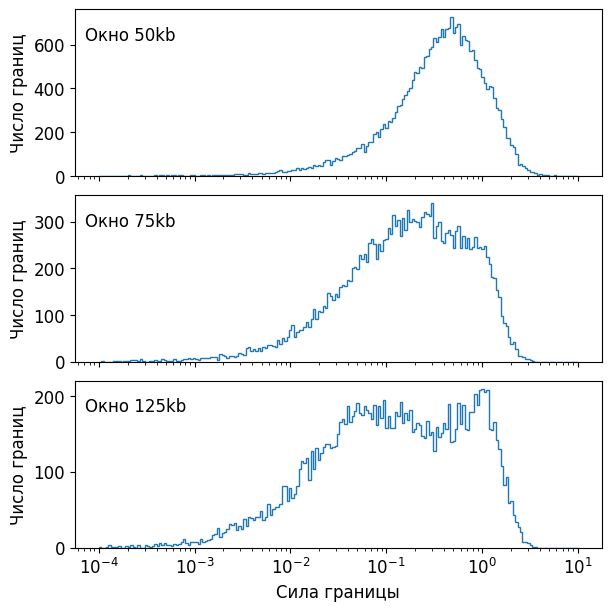

In [60]:
hist_config = dict(
    bins=np.logspace(-4, 1, 200),
    histtype='step',
    lw=2,
)

fig, axes = plt.subplots(len(windows), 1, sharex=True, figsize=(6, 6), constrained_layout=True)

for w, ax in zip(windows, axes):
    strengths = insulation_table1[f'boundary_strength_{w}'].dropna()
    ax.hist(strengths, **hist_config)
    ax.set(
        xscale='log',
        ylabel='Число границ'
    )
    ax.text(0.02, 0.9, f'Окно {w//1000}kb', transform=ax.transAxes, ha='left', va='top')

axes[-1].set(xlabel='Сила границы')


[Text(0.5, 0, 'Boundary strength')]

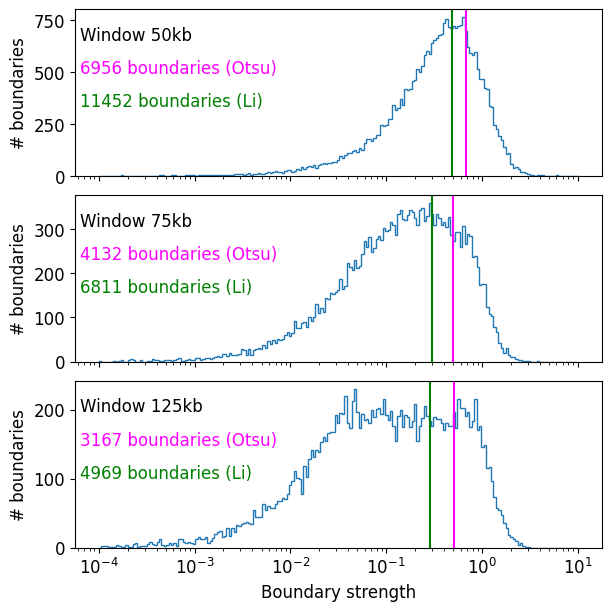

In [68]:
from skimage.filters import threshold_li, threshold_otsu

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table2[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table2[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table2[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table2[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table2[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

In [71]:
filtered = insulation_table1[insulation_table1[f'boundary_strength_{selected_window}'] >= thresholds_otsu[selected_window]].copy()
filtered.rename(columns={f'boundary_strength_{selected_window}': 'score'}, inplace=True)

drop_cols = [
    'region',
    'is_bad_bin',
    f'log2_insulation_score_{selected_window}',
    f'n_valid_pixels_{selected_window}',
    f'is_boundary_{selected_window}'
]
filtered.drop(columns=drop_cols, inplace=True)

filtered.rename(columns={'chrom': 'Chromosome', 'start': 'Start', 'end': 'End'}, inplace=True)
bed = pybed.BedFrame.from_frame(meta=['Chromosome', 'Start', 'End', 'score'], data=filtered)
bed.to_file('tads_clr1.bed')

!head tads_clr1.bed

Chromosome
Start
End
score
chr1	3350000	3375000	-0.19417615807470376	6.0	0.06555149085981267	22.0	0.820087698648122	0.4042286189248571	0.15681645113544818	True	False
chr1	3675000	3700000	-0.4205010350632288	6.0	-0.3576268172159914	22.0	0.9911618603635786	0.6682815646535203		True	False
chr1	4750000	4775000	-0.9332878970803222	6.0	-1.0000843483955595	22.0	2.2023006905547198	1.8787244138546955	1.601062958463849	True	True
chr1	4900000	4925000	-0.23178634023752473	6.0	-0.1967634319945666	22.0	0.7429317564710136		0.2166896683960813	False	False
chr1	5050000	5075000	-0.19166630054249822	6.0	-0.14887762443579727	22.0	1.024891563316193			False	False
chr1	5200000	5225000	-0.340369312714378	3.0	-0.5572852149874415	17.0	0.8059340639239658		0.8223147201171479	False	True


In [79]:
filtered = insulation_table2[insulation_table2[f'boundary_strength_{selected_window}'] >= thresholds_otsu[selected_window]].copy()
filtered.rename(columns={f'boundary_strength_{selected_window}': 'score'}, inplace=True)

drop_cols = [
    'region',
    'is_bad_bin',
    f'log2_insulation_score_{selected_window}',
    f'n_valid_pixels_{selected_window}',
    f'is_boundary_{selected_window}'
]
filtered.drop(columns=drop_cols, inplace=True)

filtered.rename(columns={'chrom': 'Chromosome', 'start': 'Start', 'end': 'End'}, inplace=True)
bed = pybed.BedFrame.from_frame(meta=['Chromosome', 'Start', 'End', 'score'], data=filtered)
bed.to_file('tads_clr2.bed')

!head tads_clr2.bed

Chromosome
Start
End
score
chr1	3675000	3700000	-0.5033154444016297	6.0	-0.535644197292274	22.0	1.240110949341006			False	False
chr1	4750000	4775000	-0.8513197342488936	6.0	-0.8747021803875359	22.0	1.7440179881081126	1.6696981670323279	1.2588724927240822	True	True
chr1	5175000	5200000	-0.5014148581381934	6.0	-0.5998800677062505	17.0	1.2684929428993925			False	False
chr1	6175000	6200000	-0.8503177119916077	6.0	-0.8526464083877774	22.0	1.5832736692226184	1.1181009126288775		True	False
chr1	6375000	6400000	-0.5844396712836705	6.0	-0.4353697684967706	22.0	0.9637358994226319			False	False
chr1	6700000	6725000	-0.6211714275438169	6.0	-0.507649367703606	22.0	1.2171607110959577	0.9126074164019393	0.6645537462570531	True	True
